<a href="https://colab.research.google.com/github/Azimoj/Classifier-automatiquement-des-biens-de-consommation/blob/main/Classifier_automatiquement_des_biens_de_consommation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The "Marketplace" company is launching an e-commerce marketplace where sellers offer items by posting a photo and description. Currently the categorization of the small number of products is done manually. The e-commerce site aims to expand and significantly increase the number of products, and manual categorization would be a long and unreliable step. To facilitate the posting of new articles and the search for products, it becomes necessary to automate this task. This categorization will be done from the descriptions and images of the products.

La mission est de réaliser une première étude de faisabilité d'un moteur de classification d'articles basé sur une image et une description pour l'automatisation de l'attribution de la catégorie de l'article.

### **Text Analysis**

https://towardsdatascience.com/text-normalization-for-natural-language-processing-nlp-70a314bfa646

In [50]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [58]:
import numpy as np
import pandas as pd
import string
#for visualisation
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [59]:
import nltk
from nltk.tokenize import word_tokenize  
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import *

In [62]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
%cd /content/drive/My\Drive/p6
!ls

data_consumption = pd.read_csv('/content/drive/MyDrive/p6/flipkart_com-ecommerce_sample_1050.csv')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-63-c21fb989be89>", line 1, in <module>
    get_ipython().magic('cd /content/drive/My\\Drive/p6')
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2160, in magic
    return self.run_line_magic(magic_name, magic_arg_s)
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2081, in run_line_magic
    result = fn(*args,**kwargs)
  File "<decorator-gen-84>", line 2, in cd
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/magic.py", line 188, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/magics/osm.py", line 288, in cd
    oldcwd = py3compat.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the abo

OSError: ignored

In [6]:
data_consuption.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [52]:
data_consuption.shape

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-52-1ed967d4e9ad>", line 1, in <module>
    data_consuption.shape
NameError: name 'data_consuption' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/ult

NameError: ignored

In [8]:
data_consuption.isnull().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

 ***We have some missing values!!***

---



### **Missing values and imputation**

In [9]:
import missingno as msno

In [53]:
msno.bar(data_consuption,  figsize=(10,5), fontsize=12, color="purple")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-53-4747e310b295>", line 1, in <module>
    msno.bar(data_consuption,  figsize=(10,5), fontsize=12, color="purple")
NameError: name 'data_consuption' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/

NameError: ignored

there is missing value for 'retail_price' , 'discounted_price' , 'brand' & 'product_specifications'

**Imputation**

In [54]:
data_consuption['retail_price'].fillna((data_consuption['retail_price'].median()), inplace=True)
data_consuption['discounted_price'].fillna((data_consuption['discounted_price'].median()), inplace=True)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-54-1113f21e5c5a>", line 1, in <module>
    data_consuption['retail_price'].fillna((data_consuption['retail_price'].median()), inplace=True)
NameError: name 'data_consuption' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context,

NameError: ignored

In [12]:
data_con['brand'].fillna((data_con['brand'].mode()[0]), inplace=True)
data_con['product_specifications'].fillna((data_con['product_specifications'].mode()[0]), inplace=True)

In [13]:
data_con.isnull().sum()

uniq_id                    0
crawl_timestamp            0
product_url                0
product_name               0
product_category_tree      0
pid                        0
retail_price               0
discounted_price           0
image                      0
is_FK_Advantage_product    0
description                0
product_rating             0
overall_rating             0
brand                      0
product_specifications     0
dtype: int64

### **Exploration**

### crawl_timestamp

In [14]:
data_con.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

In [15]:
data_con['crawl_timestamp']

0       2016-04-30 03:22:56 +0000
1       2016-04-30 03:22:56 +0000
2       2016-04-30 03:22:56 +0000
3       2016-06-20 08:49:52 +0000
4       2016-06-20 08:49:52 +0000
                  ...            
1045    2015-12-01 10:15:43 +0000
1046    2015-12-01 10:15:43 +0000
1047    2015-12-01 10:15:43 +0000
1048    2015-12-01 10:15:43 +0000
1049    2015-12-01 10:15:43 +0000
Name: crawl_timestamp, Length: 1050, dtype: object

In [16]:
data_con['crawl_timestamp'] = data_con['crawl_timestamp'].astype('datetime64')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

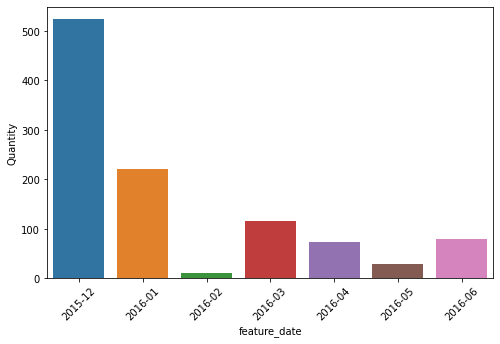

In [17]:
df_tmp = pd.DataFrame(pd.DatetimeIndex(data_con['crawl_timestamp']).to_period('M'))
tmp = df_tmp['crawl_timestamp'].value_counts()

df_tmp = pd.DataFrame({ 'feature_date': tmp.index, 'Quantity': tmp.values })
df_tmp = df_tmp.sort_values(by='feature_date')

fig, ax = plt.subplots(figsize=(8, 5))
sns.set_color_codes("pastel")

s = sns.barplot(ax=ax,
                    x='feature_date',
                    y='Quantity',
                    data=df_tmp)
plt.xticks(rotation=45)

In [18]:
df_tmp

,feature_date,Quantity
0,2015-12,523
1,2016-01,220
6,2016-02,10
2,2016-03,115
4,2016-04,74
5,2016-05,29
3,2016-06,79


In [19]:
data = data_con.filter(items=['image', 'product_name', 'product_category_tree', 'description'])

## **Cleaning dataset & visualisation**

### Product Name

In [20]:
data['product_name'].unique()

array(['Elegance Polyester Multicolor Abstract Eyelet Door Curtain',
       'Sathiyas Cotton Bath Towel',
       'Eurospa Cotton Terry Face Towel Set', ...,
       'Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker',
       'Wallmantra Medium Vinyl Sticker Sticker',
       'Uberlyfe Large Vinyl Sticker'], dtype=object)

In [21]:
data['product_name'].value_counts()

Shrikant Traders Cotton Bath Towel                  1
Logues LGSWATCHES760SL Analog Watch  - For Women    1
Wild Stone Smoke And Juice Combo Set                1
NIKsales 7 W LED Bulb                               1
Philips 9.5 W LED B22 3000K A55 IND Bulb            1
                                                   ..
Like Analog Purple Clock                            1
Maxima 06362CMGY Gold Analog Watch  - For Men       1
Pigeon Kadhai 1.2 L                                 1
MB Cotton Set of Towels                             1
Jaipan KD2.5 Kadhai 2.5 L                           1
Name: product_name, Length: 1050, dtype: int64

**Cleaning 'product_category_tree' column**

In [22]:
data['product_category_tree'][1]

'["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]'

In [23]:
data['product_category_tree'][1].split('["')

['',
 'Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]']

In [24]:
data['product_category_tree'][1].split('["')[1]

'Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]'

In [25]:
data['product_category_tree'][1].split('["')[1].split('"]')

['Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...',
 '']

In [26]:
data['product_category_tree'][1].split('["')[1].split('"]')[0]

'Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...'

In [27]:
def split_categories(category, level):
    
    category = category.split('["')[1].split('"]')[0]
    cat = category.split(' >> ')
    if(len(cat)) <= 2:
        cat = [cat[0],  'None']
        
    return cat[level]

### **Transformation function**

In [28]:
#1st category of the list
def split_categories_1(category):
    return split_categories(category,0)
#2nd category of the list
def split_categories_2(category):
    return split_categories(category,1)



Adding 2 categories in our dataset

In [29]:
def detail_categories(dataframe):                                                                                           
    dataframe['product_category'] = dataframe['product_category_tree'].apply(split_categories_1)
    dataframe['product_category_level'] = dataframe['product_category_tree'].apply(split_categories_2)

    return dataframe

In [30]:
data=detail_categories(data)

In [31]:
data.drop('product_category_tree',inplace=True, axis=1)

In [32]:
data.head()

,image,product_name,description,product_category,product_category_level
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,Curtains & Accessories
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,Baby Bath & Skin
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,Baby Bath & Skin
3,d4684dcdc759dd9cdf41504698d737d8.jpg,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,Bed Linen
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,Bed Linen


In [33]:
data.columns


Index(['image', 'product_name', 'description', 'product_category',
       'product_category_level'],
      dtype='object')

In [34]:
data['product_category'].nunique()

7

In [35]:
data['product_category'].head()

0    Home Furnishing
1          Baby Care
2          Baby Care
3    Home Furnishing
4    Home Furnishing
Name: product_category, dtype: object

In [36]:
data['product_category'].value_counts()

Computers                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Home Furnishing               150
Baby Care                     150
Name: product_category, dtype: int64

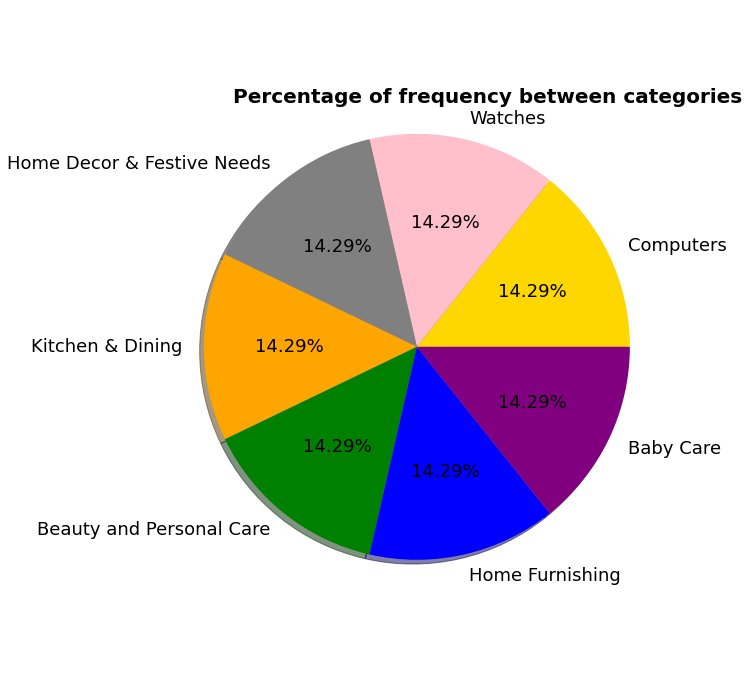

In [37]:
values = data['product_category'].value_counts()
labels = data['product_category'].value_counts().index
colors = ['gold', 'pink', 'grey', 'orange', 'green', 'blue', 'purple']
explode = (0, 0, 0, 0, 0, 0, 0)

# Plot
plt.figure(figsize=(10, 10))
plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct='%.2f%%', shadow=True, textprops={'fontsize': 18})

ttl = plt.title( "Percentage of frequency between categories",  fontweight = 'bold' ,fontsize=20)

ttl.set_position([0.65, 0.85])
plt.axis('equal')
plt.tight_layout()

In [39]:
data['product_category_level'].nunique()

62

In [40]:
pd.set_option('display.max_row',62)
data['product_category_level'].value_counts().head(20)
#Nous avons 62 catégories 
#c'est plus détaille que les categories de la colonne cat_lvl1

Wrist Watches                149
Laptop Accessories            87
Infant Wear                   84
Coffee Mugs                   74
Showpieces                    71
Bed Linen                     65
Fragrances                    65
Network Components            49
Cookware                      27
Table Decor & Handicrafts     27
Combos and Kits               24
Wall Decor & Clocks           22
Bath Linen                    21
Curtains & Accessories        19
Makeup                        18
Baby & Kids Gifts             15
Baby Bedding                  15
Body and Skin Care            15
Kitchen & Dining Linen        14
Kitchen Tools                 14
Name: product_category_level, dtype: int64

### **Text Preprocessing**

* remove punctional
* keep only alphabetic characters
* remove stopwords and isolated letters
* put all words in lowercase
* lemmatization
* keep only the canonical forms of words



In [ ]:
data['description'].head()

0    Key Features of Elegance Polyester Multicolor ...
1    Specifications of Sathiyas Cotton Bath Towel (...
2    Key Features of Eurospa Cotton Terry Face Towe...
3    Key Features of SANTOSH ROYAL FASHION Cotton P...
4    Key Features of Jaipur Print Cotton Floral Kin...
Name: description, dtype: object

In [ ]:
data['description'].sample(5)

999    Key Features of Balaji Velvet Sofa Cover 5 Sea...
506    Buy Rega IT Gateway MD7822 MD-7822 MD7822U 6 C...
941    The Intellect Bazaar Geometric Single Blanket ...
707    Buy Home Originals Polka, Abstract Double Blan...
516    Sonata 7016YM09 Watch - Buy Sonata 7016YM09 Wa...
Name: description, dtype: object

In [ ]:
len(data['description'])

1050

**Function for the number of words**

In [41]:
def word_size(base,columns):
  corpus=base[columns]

  words_dico=dict()
  import re
  #importation regular expressions

  expr = re.compile("\W+",re.U) # Regular expression of segmentation on spaces
  for text in corpus: # For each comment in the corpus
    text = str(text)
    text = expr.split(text)
    for word in set(text): # Retrieving each new word
      if word not in words_dico:
        words_dico[word]=1
      else: 
          # For each word already listed: add 1 if it is found
            words_dico[word]=words_dico[word]+1

  return len(words_dico)

In [42]:
size=word_size(data,'description')
print(size)


7671


In [43]:
raw_text= data.copy()

In [44]:
# Lower text without punctuations description
from string import punctuation
lower_list = []
for row in range(raw_text['description'].size):
    text = raw_text['description'][row]
    lowers = text.lower()
    nopunc_table = str.maketrans('', '', punctuation)
    text_nopunc = lowers.translate(nopunc_table)
    lower_list.append(text_nopunc)
raw_text['lower_description'] = lower_list

In [48]:
categories = data["product_category_level"]

NameError: ignored

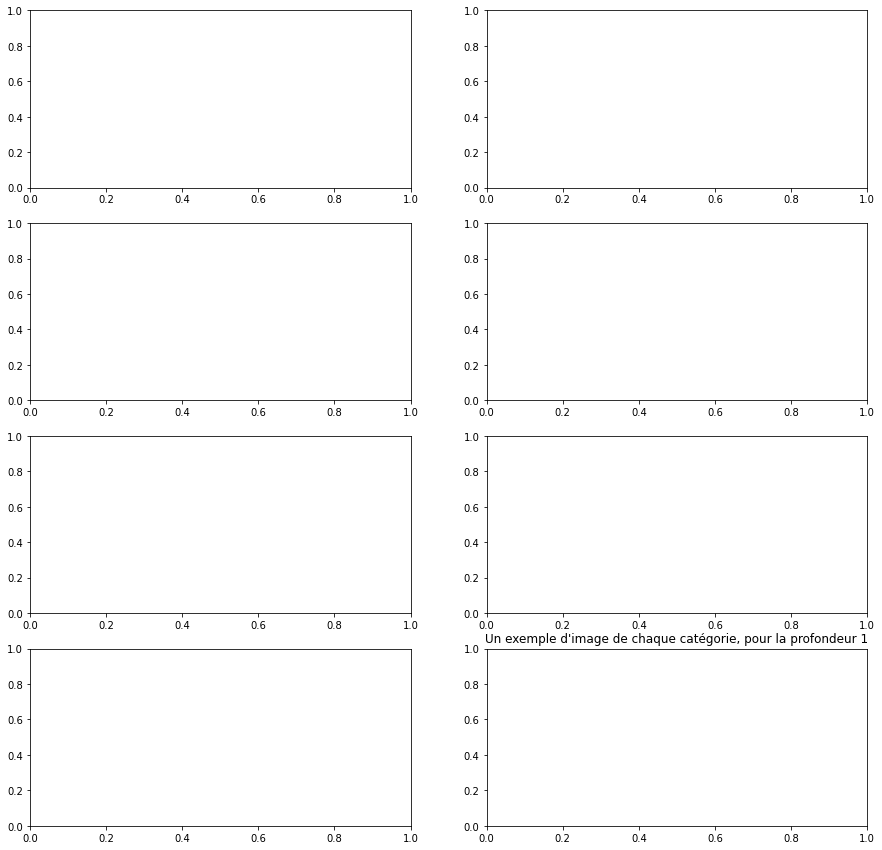

In [49]:
fig, ax = plt.subplots(4, 2)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.title("Un exemple d'image de chaque catégorie, pour la profondeur 1")
for i, categ in enumerate(categories.unique()) :
    name_image = data[categories == categ]["image"].iloc[0]
    img = cv2.imread(path + "Images/" + name_image)
    ax[i%4, i//4].set_title(categ)
    ax[i%4, i//4].imshow(img)
  
plt.show()

In [ ]:
%cd 10_breeds_split/

[Errno 2] No such file or directory: '10_breeds_split/'
/content/drive/MyDrive/p6


In [ ]:
raw_text= data.copy()

In [ ]:
# lower_text
clean_text_1 =[]
def to_lower_text(data):
  for words in raw_text:
    clean_text_1.append(str.lower(words))

In [ ]:
to_lower_text(raw_text)

In [ ]:
raw_text

,image,product_name,description,product_category,product_category_level
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,Curtains & Accessories
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,Baby Bath & Skin
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,Baby Bath & Skin
3,d4684dcdc759dd9cdf41504698d737d8.jpg,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,Bed Linen
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,Bed Linen
...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,Baby & Kids Gifts
1046,fd6cbcc22efb6b761bd564c28928483c.jpg,Wallmantra Large Vinyl Sticker Sticker,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,Baby & Kids Gifts
1047,5912e037d12774bb73a2048f35a00009.jpg,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,Baby & Kids Gifts
1048,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Wallmantra Medium Vinyl Sticker Sticker,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,Baby & Kids Gifts


**Punctuation** 

In [ ]:
import string
# https://docs.python.org/3/library/string.html

In [ ]:
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# function that removes all punctuation 
#https://www.w3schools.com/python/ref_string_join.asp
myTuple = ("John"," Peter", "Vicky")

x = "".join(myTuple)
print(x)

John PeterVicky


In [ ]:
def removing_ponctuation(text):
  exclude = set(string.punctuation)
  text_nopunc=''.join([char for char in text if char not in exclude])
  return text_nopunc

In [ ]:
data['description'][0]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [ ]:
removing_ponctuation(data['description'][0])


'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral CurtainElegance Polyester Multicolor Abstract Eyelet Door Curtain 213 cm in Height Pack of 2 Price Rs 899 This curtain enhances the look of the interiorsThis curtain is made from 100 high quality polyester fabricIt features an eyelet style stitch with Metal RingIt makes the room environment romantic and lovingThis curtain is ant wrinkle and anti shrinkage and have elegant apparanceGive your home a bright and modernistic appeal with these designs The surreal attention is sure to steal hearts These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening you create the most special moments of joyous beauty given by the soothing prints Bring home the elegant curtain that softly filters light in your room so that you get the right am

In [ ]:
data['description_nopunc']=data['description'].apply(lambda x: removing_ponctuation(x))

In [ ]:
size_filtre1=word_size(data,'description_nopunc')
print(size_filtre1)

8212


In [ ]:
data[['description','description_nopunc']].head(6)

,description,description_nopunc
0,Key Features of Elegance Polyester Multicolor ...,Key Features of Elegance Polyester Multicolor ...
1,Specifications of Sathiyas Cotton Bath Towel (...,Specifications of Sathiyas Cotton Bath Towel 3...
2,Key Features of Eurospa Cotton Terry Face Towe...,Key Features of Eurospa Cotton Terry Face Towe...
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Key Features of SANTOSH ROYAL FASHION Cotton P...
4,Key Features of Jaipur Print Cotton Floral Kin...,Key Features of Jaipur Print Cotton Floral Kin...
5,Maserati Time R8851116001 Analog Watch - For ...,Maserati Time R8851116001 Analog Watch For B...


* 2) USE nltk.RegexpTokenizer() TO REMOVE ALL PUNCTUATION MARKS

In [ ]:
#https://www.debuggex.com/cheatsheet/regex/python
#https://www.kite.com/python/docs/nltk.RegexpTokenizer

def Harmonisation(text):
  tokenizer = nltk.RegexpTokenizer(r'\w+')
  tokens=tokenizer.tokenize(text)
  return tokens

In [ ]:
data['description'][0]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [ ]:
Harmonisation(data['description'][0])

['Key',
 'Features',
 'of',
 'Elegance',
 'Polyester',
 'Multicolor',
 'Abstract',
 'Eyelet',
 'Door',
 'Curtain',
 'Floral',
 'Curtain',
 'Elegance',
 'Polyester',
 'Multicolor',
 'Abstract',
 'Eyelet',
 'Door',
 'Curtain',
 '213',
 'cm',
 'in',
 'Height',
 'Pack',
 'of',
 '2',
 'Price',
 'Rs',
 '899',
 'This',
 'curtain',
 'enhances',
 'the',
 'look',
 'of',
 'the',
 'interiors',
 'This',
 'curtain',
 'is',
 'made',
 'from',
 '100',
 'high',
 'quality',
 'polyester',
 'fabric',
 'It',
 'features',
 'an',
 'eyelet',
 'style',
 'stitch',
 'with',
 'Metal',
 'Ring',
 'It',
 'makes',
 'the',
 'room',
 'environment',
 'romantic',
 'and',
 'loving',
 'This',
 'curtain',
 'is',
 'ant',
 'wrinkle',
 'and',
 'anti',
 'shrinkage',
 'and',
 'have',
 'elegant',
 'apparance',
 'Give',
 'your',
 'home',
 'a',
 'bright',
 'and',
 'modernistic',
 'appeal',
 'with',
 'these',
 'designs',
 'The',
 'surreal',
 'attention',
 'is',
 'sure',
 'to',
 'steal',
 'hearts',
 'These',
 'contemporary',
 'eyelet'

In [ ]:
data['description'].apply(lambda x : Harmonisation(x))

0       [Key, Features, of, Elegance, Polyester, Multi...
1       [Specifications, of, Sathiyas, Cotton, Bath, T...
2       [Key, Features, of, Eurospa, Cotton, Terry, Fa...
3       [Key, Features, of, SANTOSH, ROYAL, FASHION, C...
4       [Key, Features, of, Jaipur, Print, Cotton, Flo...
                              ...                        
1045    [Oren, Empower, Extra, Large, Self, Adhesive, ...
1046    [Wallmantra, Large, Vinyl, Sticker, Sticker, P...
1047    [Buy, Uberlyfe, Extra, Large, Pigmented, Polyv...
1048    [Buy, Wallmantra, Medium, Vinyl, Sticker, Stic...
1049    [Buy, Uberlyfe, Large, Vinyl, Sticker, for, Rs...
Name: description, Length: 1050, dtype: object

 **Number** 

In [ ]:
# we will replace all the numbers that we found by a space
def replace_num(string):
  string.replace('[0-9]',' ')
  return string

In [ ]:
data['description_nopunc'].apply(replace_num)

KeyError: ignored

In [ ]:
data['description_nonum']=data['description_nopunc'].str.replace('[0-9]',' ')

In [ ]:
size_filtre2=word_size(data,'description_nonum') 
print(size_filtre2)

7243


In [ ]:
data[['description','description_nopunc','description_nonum']].head(6)

,description,description_nopunc,description_nonum
0,Key Features of Elegance Polyester Multicolor ...,Key Features of Elegance Polyester Multicolor ...,Key Features of Elegance Polyester Multicolor ...
1,Specifications of Sathiyas Cotton Bath Towel (...,Specifications of Sathiyas Cotton Bath Towel 3...,Specifications of Sathiyas Cotton Bath Towel ...
2,Key Features of Eurospa Cotton Terry Face Towe...,Key Features of Eurospa Cotton Terry Face Towe...,Key Features of Eurospa Cotton Terry Face Towe...
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Key Features of SANTOSH ROYAL FASHION Cotton P...
4,Key Features of Jaipur Print Cotton Floral Kin...,Key Features of Jaipur Print Cotton Floral Kin...,Key Features of Jaipur Print Cotton Floral Kin...
5,Maserati Time R8851116001 Analog Watch - For ...,Maserati Time R8851116001 Analog Watch For B...,Maserati Time R Analog Watch For Boys Buy M...


### **Tokenize**

Tokenization is a way of separating a piece of text into smaller units called tokens. Here, tokens can be either words, characters, or subwords. Hence, tokenization can be broadly classified into 3 types – word, character, and subword (n-gram characters) tokenization.


1.   Character tokens: s-m-a-r-t-e-r
2.   Subword tokens: smart-er
3.   Word tokenization:  Never-give-up

https://www.analyticsvidhya.com/blog/2020/05/what-is-tokenization-nlp/

In [ ]:
nltk.download('punkt')

def Tokenisationetnorm(text):
  tokens=nltk.word_tokenize(text.lower())
  #tokens=nltk.word_tokenize(text)
  return tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
data['description_token']=data['description_nonum'].apply(lambda x : Tokenisationetnorm(x))

In [ ]:
data[['description','description_nonum','description_token']].head()

,description,description_nonum,description_token
0,Key Features of Elegance Polyester Multicolor ...,Key Features of Elegance Polyester Multicolor ...,"[key, features, of, elegance, polyester, multi..."
1,Specifications of Sathiyas Cotton Bath Towel (...,Specifications of Sathiyas Cotton Bath Towel ...,"[specifications, of, sathiyas, cotton, bath, t..."
2,Key Features of Eurospa Cotton Terry Face Towe...,Key Features of Eurospa Cotton Terry Face Towe...,"[key, features, of, eurospa, cotton, terry, fa..."
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, features, of, santosh, royal, fashion, c..."
4,Key Features of Jaipur Print Cotton Floral Kin...,Key Features of Jaipur Print Cotton Floral Kin...,"[key, features, of, jaipur, print, cotton, flo..."


In [ ]:
size_filtre3=word_size(data,'description_token')
print(size_filtre3)

5674


### **Stop words**

We will delete the frequent words that do not bring any informative value

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopword=nltk.corpus.stopwords.words('english')

In [ ]:
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def remove_sw(text):
  text=[word for word in text if word not in stopword]
  return text

In [ ]:
data['description_stop']=data['description_token'].apply(lambda x : remove_sw(x))

In [ ]:
size_filtre4=word_size(data,'description_stop')
print(size_filtre4)

5559


In [ ]:
data[['description','description_stop']]

,description,description_stop
0,Key Features of Elegance Polyester Multicolor ...,"[key, features, elegance, polyester, multicolo..."
1,Specifications of Sathiyas Cotton Bath Towel (...,"[specifications, sathiyas, cotton, bath, towel..."
2,Key Features of Eurospa Cotton Terry Face Towe...,"[key, features, eurospa, cotton, terry, face, ..."
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, features, santosh, royal, fashion, cotto..."
4,Key Features of Jaipur Print Cotton Floral Kin...,"[key, features, jaipur, print, cotton, floral,..."
...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ..."
1046,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, large, vinyl, sticker, sticker, p..."
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[buy, uberlyfe, extra, large, pigmented, polyv..."
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[buy, wallmantra, medium, vinyl, sticker, stic..."


In [ ]:
data['description_stop'][5]

['maserati',
 'time',
 'r',
 'analog',
 'watch',
 'boys',
 'buy',
 'maserati',
 'time',
 'r',
 'analog',
 'watch',
 'boys',
 'r',
 'online',
 'rs',
 'india',
 'flipkartcom',
 'great',
 'discounts',
 'genuine',
 'products',
 'day',
 'replacement',
 'guarantee',
 'free',
 'shipping',
 'cash',
 'delivery']

### **Reducing the words**
* Stemming
* Lemmatization

The real difference between stemming and lemmatization is that Stemming reduces word-forms to (pseudo)stems which might be meaningful or meaningless, whereas lemmatization reduces the word-forms to linguistically valid meaning.

### **Stemming**

Stemming is the process of reducing the words to their word stem or root form. The objective of stemming is to reduce related words to the same stem even if the stem is not a dictionary word. For example, connection, connected, connecting word reduce to a common word “connect”.

In [ ]:
from nltk.stem.snowball import EnglishStemmer

In [ ]:
stemm=EnglishStemmer()
def stem_word(text):
  stem_text=[stemm.stem(word)for word in text] 
  return stem_text

In [ ]:
data['description_stem']=data['description_stop'].apply(lambda x : stem_word(x))

In [ ]:
data[['description','description_stem']]

,description,description_stem
0,Key Features of Elegance Polyester Multicolor ...,"[key, featur, eleg, polyest, multicolor, abstr..."
1,Specifications of Sathiyas Cotton Bath Towel (...,"[specif, sathiya, cotton, bath, towel, bath, t..."
2,Key Features of Eurospa Cotton Terry Face Towe...,"[key, featur, eurospa, cotton, terri, face, to..."
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, featur, santosh, royal, fashion, cotton,..."
4,Key Features of Jaipur Print Cotton Floral Kin...,"[key, featur, jaipur, print, cotton, floral, k..."
...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empow, extra, larg, self, adhes, sticke..."
1046,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, larg, vinyl, sticker, sticker, pa..."
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[buy, uberlyf, extra, larg, pigment, polyvinyl..."
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[buy, wallmantra, medium, vinyl, sticker, stic..."


In [ ]:
word_size(data,'description_stem')

4575

In [ ]:
data['description_stem'][5]

['maserati',
 'time',
 'r',
 'analog',
 'watch',
 'boy',
 'buy',
 'maserati',
 'time',
 'r',
 'analog',
 'watch',
 'boy',
 'r',
 'onlin',
 'rs',
 'india',
 'flipkartcom',
 'great',
 'discount',
 'genuin',
 'product',
 'day',
 'replac',
 'guarante',
 'free',
 'ship',
 'cash',
 'deliveri']

### **Lemmatization** 

In [ ]:
import nltk
nltk.download('wordnet')
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in text]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
data['description_lemma']=data['description_stop'].apply(lambda x : lemmatize_text(x))

In [ ]:
data['description_lemma'][5]

['maserati',
 'time',
 'r',
 'analog',
 'watch',
 'boy',
 'buy',
 'maserati',
 'time',
 'r',
 'analog',
 'watch',
 'boy',
 'r',
 'online',
 'r',
 'india',
 'flipkartcom',
 'great',
 'discount',
 'genuine',
 'product',
 'day',
 'replacement',
 'guarantee',
 'free',
 'shipping',
 'cash',
 'delivery']

In [ ]:
word_size(data,'description_lemma')

5149

** Deleting the words with one letter

In [ ]:
def rem_short_words(words_list, char_len = 2):
    word_len = [len(i) for i in words_list]
    index_keep = np.array(word_len) > char_len
    words_list_red = np.array(words_list)[index_keep]
    return(list(words_list_red))

In [ ]:
data['description_lemma_short']=data['description_lemma'].apply(rem_short_words)

In [ ]:
word_size(data,'description_lemma_short')

5008

### **Frequency calculation**

Term frequency answers the question of, how many times does this word appear in this document, how important is this word to this specific document.

The re. compile() method:

With this method we can combine a regular expression pattern into pattern objects, which can be used for pattern matching. It also helps to search a pattern again without rewriting it

In [ ]:
# http://pymotw.com/2/re/

import re
#import the regular expressions

corpus=data['description_lemma_short']
words_dico=dict()

expr =re.compile("\W+",re.U) #  method is used to compile a regular expression pattern provided as a string into a regex pattern object (re.Pattern)
for text in corpus:           # re.U. Interprets letters according to the Unicode character set. This flag affects the behavior of \w, \W, \b, \B. 6.
  text = str(text)
  text = expr.split(text)
  for word in set(text): 
    if word not in words_dico:
      words_dico[word]=1
    else: 
          words_dico[word]=words_dico[word]+1

print(words_dico)

{'': 1050, 'fabricit': 1, 'bright': 9, 'draw': 3, 'eyelet': 19, 'thing': 3, 'interiorsthis': 1, 'color': 225, 'brand': 207, 'general': 284, 'given': 2, 'ringit': 1, 'material': 203, 'quality': 104, 'ant': 3, 'attention': 4, 'door': 18, 'polyester': 28, 'first': 10, 'appeal': 7, 'set': 158, 'style': 82, 'sure': 22, 'multicolor': 94, 'print': 54, 'design': 145, 'duster': 1, 'designed': 52, 'price': 542, 'modernistic': 1, 'curtainelegance': 1, 'pack': 207, 'smoothly': 3, 'type': 237, 'want': 5, 'amount': 3, 'slide': 2, 'name': 98, 'apart': 2, 'ray': 3, 'dimension': 148, 'soothing': 3, 'moment': 7, 'anti': 4, 'make': 61, 'made': 126, 'enhances': 6, 'room': 27, 'apparancegive': 1, 'curtain': 21, 'stitch': 2, 'valance': 1, 'number': 216, 'sun': 4, 'get': 42, 'wish': 3, 'high': 62, 'sunlightspecifications': 1, 'steal': 1, 'right': 14, 'evening': 3, 'surreal': 1, 'joyous': 1, 'whole': 6, 'floral': 39, 'look': 61, 'close': 1, 'environment': 4, 'softly': 1, 'contemporary': 12, 'body': 69, 'lovin

In [ ]:
words_dico.values()

dict_values([1050, 1, 9, 3, 19, 3, 1, 225, 207, 284, 2, 1, 203, 104, 3, 4, 18, 28, 10, 7, 158, 82, 22, 94, 54, 145, 1, 52, 542, 1, 1, 207, 3, 237, 5, 3, 2, 98, 2, 3, 148, 3, 7, 4, 61, 126, 6, 27, 1, 21, 2, 1, 216, 4, 42, 3, 62, 1, 1, 14, 3, 1, 1, 6, 39, 61, 1, 4, 1, 12, 69, 1, 1, 20, 1, 11, 5, 148, 219, 146, 80, 250, 15, 2, 55, 6, 3, 2, 1, 70, 218, 88, 26, 14, 44, 28, 202, 10, 26, 267, 98, 29, 88, 31, 79, 39, 27, 30, 1, 96, 128, 139, 1, 144, 88, 109, 58, 16, 73, 11, 24, 1, 82, 5, 1, 2, 3, 11, 15, 72, 77, 3, 5, 1, 85, 29, 14, 1, 3, 18, 18, 7, 1, 28, 21, 49, 34, 1, 22, 73, 41, 18, 98, 2, 10, 1, 2, 3, 1, 97, 14, 36, 1, 27, 19, 663, 2, 3, 27, 10, 45, 11, 1, 12, 54, 5, 13, 12, 69, 2, 2, 56, 4, 8, 37, 22, 1, 1, 114, 4, 11, 33, 43, 6, 29, 7, 19, 34, 1, 27, 60, 2, 22, 38, 4, 6, 2, 25, 2, 2, 10, 1, 1, 564, 470, 384, 513, 162, 489, 564, 576, 153, 593, 389, 166, 566, 33, 134, 564, 127, 1, 1, 1, 1, 33, 3, 4, 1, 1, 19, 1, 5, 23, 12, 47, 1, 6, 2, 18, 1, 5, 6, 3, 15, 2, 22, 17, 56, 1, 3, 2, 2, 35, 2,

In [ ]:
len(words_dico)

5008

**Frequency exploration**

In [ ]:
df_word_freq=pd.DataFrame({'words':words_dico.keys(),'Frequency':words_dico.values()})

In [ ]:
df_word_freq.sort_values(ascending=False,by='Frequency')

,words,Frequency
0,,1050
165,product,663
222,free,593
220,buy,576
225,delivery,566
...,...,...
2634,subtype,1
2636,sunlight,1
2640,manufacture,1
2642,grain,1


**Droping all the space**

In [ ]:
df_word_freq.drop([0],inplace=True, axis=0)

In [ ]:
df_word_freq.sort_values(ascending=False,by='Frequency')

,words,Frequency
165,product,663
222,free,593
220,buy,576
225,delivery,566
213,shipping,564
...,...,...
2580,radiation,1
2581,gridding,1
2582,sphere,1
2583,unlocks,1


Text(0.5, 1.0, 'Frequency of words')

<Figure size 1440x720 with 0 Axes>

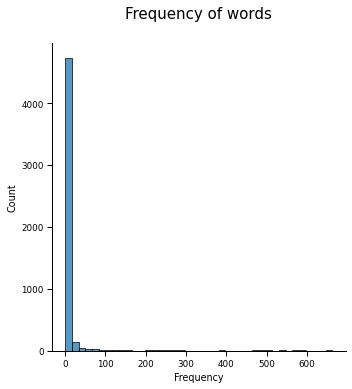

In [ ]:
plt.figure(figsize=(20,10))
sns.displot(data=df_word_freq,bins=40, x="Frequency");
plt.title('Frequency of words', fontsize = 15, pad = 25)

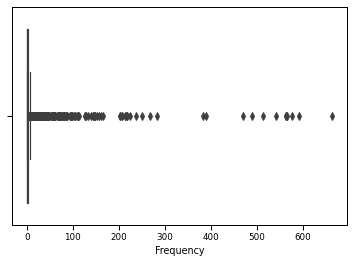

In [ ]:
sns.boxplot(data=df_word_freq,x='Frequency');

In [ ]:
df_word_freq['Frequency'].describe()

count    5007.000000
mean        6.555223
std        31.739830
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       663.000000
Name: Frequency, dtype: float64

In [ ]:
sorted_freq=df_word_freq.sort_values(by='Frequency',ascending=False)

In [ ]:
df1=sorted_freq[0:40]

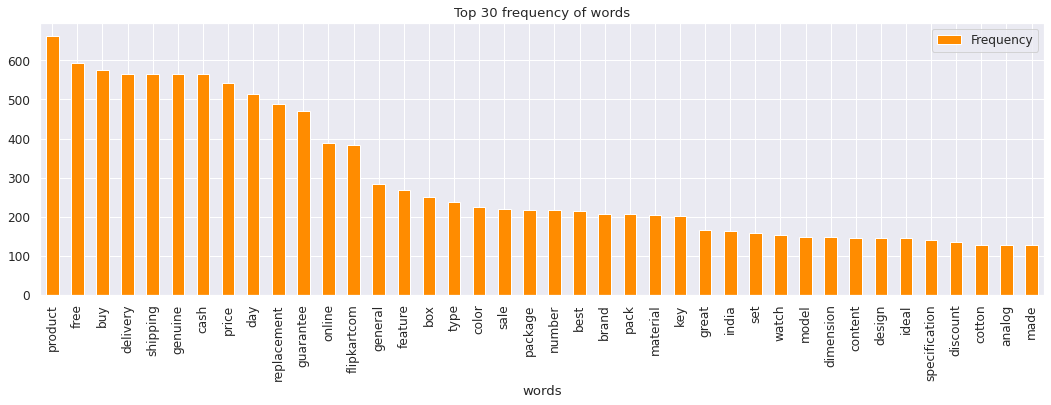

In [ ]:

sns.set(font_scale=1.1)
df1.plot(kind='bar',x='words',y='Frequency',title='Top 30 frequency of words',figsize=(18,5) ,color="darkorange")

In [ ]:
df2=sorted_freq[-41:-1]

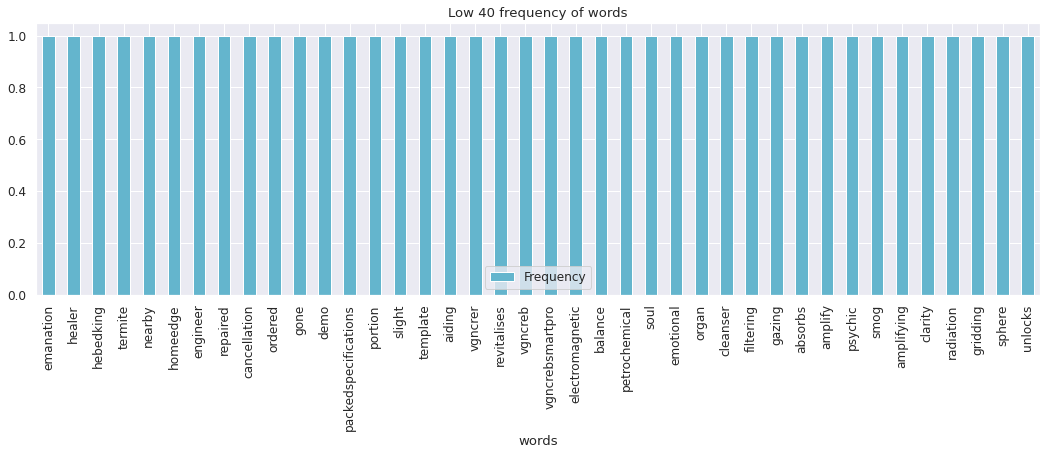

In [ ]:
df2.plot(kind='bar',x='words',y='Frequency', color="c",figsize=(18,5),title='Low 40 frequency of words')

In [ ]:
len(sorted_freq)

5007

### **word cloud**

Word clouds are fun to use as a visual aid with blog posts to underscore the keywords on which you're focusing.

In [ ]:
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

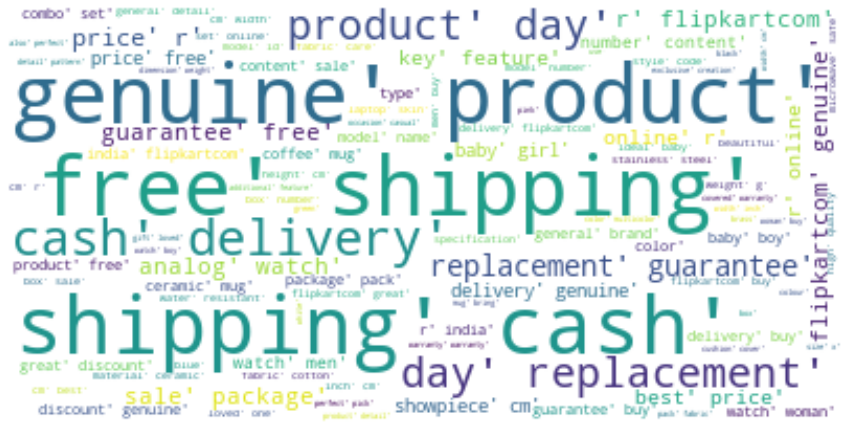

In [ ]:
stopwords = set(df1)
corpus=data['description_lemma']
wordcloud = WordCloud(stopwords=stopwords, background_color="white")
text="".join(map(str, corpus)) 
wordcloud.generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')

**Filtering dataset**

In [ ]:
data.head()

,image,product_name,description,product_category,product_category_level,description_nopunc,description_nonum,description_token,description_stop,description_stem,description_lemma,description_lemma_short
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,Curtains & Accessories,Key Features of Elegance Polyester Multicolor ...,Key Features of Elegance Polyester Multicolor ...,"[key, features, of, elegance, polyester, multi...","[key, features, elegance, polyester, multicolo...","[key, featur, eleg, polyest, multicolor, abstr...","[key, feature, elegance, polyester, multicolor...","[key, feature, elegance, polyester, multicolor..."
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,Baby Bath & Skin,Specifications of Sathiyas Cotton Bath Towel 3...,Specifications of Sathiyas Cotton Bath Towel ...,"[specifications, of, sathiyas, cotton, bath, t...","[specifications, sathiyas, cotton, bath, towel...","[specif, sathiya, cotton, bath, towel, bath, t...","[specification, sathiyas, cotton, bath, towel,...","[specification, sathiyas, cotton, bath, towel,..."
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,Baby Bath & Skin,Key Features of Eurospa Cotton Terry Face Towe...,Key Features of Eurospa Cotton Terry Face Towe...,"[key, features, of, eurospa, cotton, terry, fa...","[key, features, eurospa, cotton, terry, face, ...","[key, featur, eurospa, cotton, terri, face, to...","[key, feature, eurospa, cotton, terry, face, t...","[key, feature, eurospa, cotton, terry, face, t..."
3,d4684dcdc759dd9cdf41504698d737d8.jpg,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,Bed Linen,Key Features of SANTOSH ROYAL FASHION Cotton P...,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, features, of, santosh, royal, fashion, c...","[key, features, santosh, royal, fashion, cotto...","[key, featur, santosh, royal, fashion, cotton,...","[key, feature, santosh, royal, fashion, cotton...","[key, feature, santosh, royal, fashion, cotton..."
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,Bed Linen,Key Features of Jaipur Print Cotton Floral Kin...,Key Features of Jaipur Print Cotton Floral Kin...,"[key, features, of, jaipur, print, cotton, flo...","[key, features, jaipur, print, cotton, floral,...","[key, featur, jaipur, print, cotton, floral, k...","[key, feature, jaipur, print, cotton, floral, ...","[key, feature, jaipur, print, cotton, floral, ..."


In [ ]:
text_data= data.filter(items=['image','product_name','product_category','product_category_level','description_lemma_short'])

**Removing** all the words which are repeated once! 

In [ ]:
"""i=df_word_freq['Frequency'][-10:].index
df_word_freq['words'][i]"""

4998        practice
4999        sweeping
5000        deserves
5001    decalsticker
5002         receive
5003     personalise
5004           final
5005        uberlyfe
5006       polyvinyl
5007            film
Name: words, dtype: object

In [ ]:
print(len(df_word_freq['Frequency'].index[df_word_freq['Frequency']==1]),"words are repeated once")

2929 words are repeated once


In [ ]:
rem_list = list(df_word_freq['Frequency'].index[df_word_freq['Frequency']==1])
df_word_freq['words'][rem_list].values

array(['fabricit', 'interiorsthis', 'ringit', ..., 'final', 'polyvinyl',
       'film'], dtype=object)

In [ ]:
# remove all the words which are repeated once
text_data['description_final'] = text_data['description_lemma_short'].apply(lambda x: [i for i in x if i not in df_word_freq['words'][rem_list].values])

In [ ]:
word_size(text_data,'description_final')

2085

In [ ]:
text_data['description_final']

0       [key, feature, elegance, polyester, multicolor...
1       [specification, cotton, bath, towel, bath, tow...
2       [key, feature, cotton, terry, face, towel, set...
3       [key, feature, santosh, royal, fashion, cotton...
4       [key, feature, jaipur, print, cotton, floral, ...
                              ...                        
1045    [empower, extra, large, self, adhesive, sticke...
1046    [wallmantra, large, vinyl, sticker, sticker, p...
1047    [buy, uberlyfe, extra, large, pigmented, impor...
1048    [buy, wallmantra, medium, vinyl, sticker, stic...
1049    [buy, uberlyfe, large, vinyl, sticker, online,...
Name: description_final, Length: 1050, dtype: object

**Analyse exploratoire apres suppression**

In [ ]:
stats, freq = dict(), dict()
for k, v in text_data['description_final'].iteritems():
  freq[k] = fq = nltk.FreqDist(v)
  stats[k] = {'total': len(v)} 


freq_totale = nltk.Counter()
for k, v in text_data['description_final'].iteritems():
    freq_totale += freq[k]

In [ ]:
freq_totale.keys()

dict_keys(['key', 'feature', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'height', 'pack', 'price', 'enhances', 'look', 'made', 'high', 'quality', 'style', 'stitch', 'metal', 'make', 'room', 'environment', 'ant', 'anti', 'shrinkage', 'elegant', 'home', 'bright', 'appeal', 'design', 'attention', 'sure', 'heart', 'contemporary', 'slide', 'smoothly', 'draw', 'apart', 'first', 'thing', 'morning', 'welcome', 'sun', 'ray', 'want', 'wish', 'good', 'whole', 'world', 'evening', 'create', 'special', 'moment', 'beauty', 'given', 'soothing', 'print', 'bring', 'light', 'get', 'right', 'amount', 'general', 'brand', 'designed', 'type', 'model', 'name', 'set', 'color', 'dimension', 'length', 'box', 'number', 'content', 'sale', 'package', 'body', 'material', 'specification', 'cotton', 'bath', 'towel', 'red', 'yellow', 'blue', 'machine', 'washable', 'yes', 'self', 'gsm', 'ideal', 'men', 'woman', 'boy', 'girl', 'size', 'inch', 'width', 'terry', 'face', 'small

In [ ]:
df=pd.DataFrame({'words':freq_totale.keys(),'Frequency':freq_totale.values()})

In [ ]:
df

,words,Frequency
0,key,227
1,feature,403
2,elegance,10
3,polyester,68
4,multicolor,167
...,...,...
2079,residuespecifications,10
2080,suitablefor,11
2081,patta,2
2082,d�cor,2


Text(0.5, 1.0, 'word frequency after cleaning')

<Figure size 1440x720 with 0 Axes>

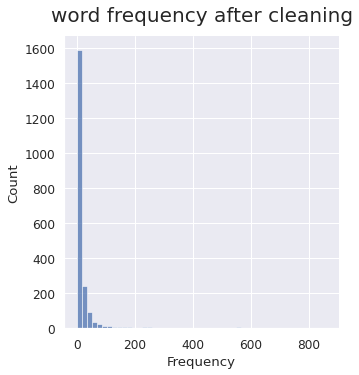

In [ ]:
plt.figure(figsize=(20,10))
sns.displot(data=df,bins=50, x="Frequency");
plt.title('word frequency after cleaning', fontsize = 20, pad = 15)

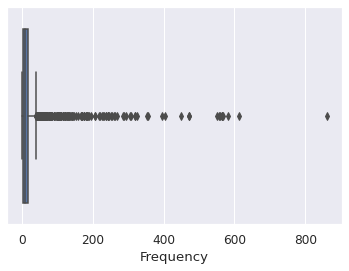

In [ ]:
sns.boxplot(data=df,x='Frequency');

In [ ]:
df['Frequency'].describe()

count    2084.000000
mean       22.765355
std        59.434219
min         1.000000
25%         4.000000
50%         7.000000
75%        18.000000
max       861.000000
Name: Frequency, dtype: float64

## **Bag of words**

The bag-of-words model is a way of representing text data when modeling text with machine learning algorithms.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
corpus=text_data['description_lemma_short'].apply(lambda x: ','.join(x))
corpus

0       key,feature,elegance,polyester,multicolor,abst...
1       specification,sathiyas,cotton,bath,towel,bath,...
2       key,feature,eurospa,cotton,terry,face,towel,se...
3       key,feature,santosh,royal,fashion,cotton,print...
4       key,feature,jaipur,print,cotton,floral,king,si...
                              ...                        
1045    oren,empower,extra,large,self,adhesive,sticker...
1046    wallmantra,large,vinyl,sticker,sticker,pack,pr...
1047    buy,uberlyfe,extra,large,pigmented,polyvinyl,f...
1048    buy,wallmantra,medium,vinyl,sticker,sticker,on...
1049    buy,uberlyfe,large,vinyl,sticker,online,uberly...
Name: description_lemma_short, Length: 1050, dtype: object

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1,1),analyzer = "word")
X = vectorizer.fit_transform(corpus)

In [ ]:
features_names=vectorizer.get_feature_names()
dense=X.todense()
denselist=dense.tolist()
#comptage_mots=pd.DataFrame(denselist,columns=features_names)
comptage_mots=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
comptage_mots.head()

,aaa,aapno,aari,aarika,ability,abklgrngrngrn,abklplplpnk,abklplpnkpnk,able,abode,abrasion,abroad,absolute,absorbency,absorbent,absorber,absorbing,absorbs,abstract,abstrcts,accent,access,accessory,accident,accidental,accommodate,accomplishes,according,acer,ache,aching,aci,acid,acne,across,acrylic,act,active,actu,actual,...,xcm,xcmdesign,xemex,xgb,xuser,yardley,yarn,ybscr,year,yellow,yellowblue,yellowlittle,yes,yet,ygs,ygskb,yiboo,yield,york,youd,young,youre,youth,youthful,youve,yuva,yves,zaicus,zero,zikrak,zinc,zingalalaa,zip,zipexterior,zipper,zippered,zone,zoom,zora,zyxel
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df=pd.DataFrame({'Word frequancy': comptage_mots.max().sort_values(ascending=False).index,'Total':comptage_mots.max().sort_values(ascending=False).values})

In [ ]:
df

,Word frequancy,Total
0,product,21
1,laptop,21
2,bowl,21
3,blanket,19
4,towel,18
...,...,...
5001,maxifull,1
5002,matterythmx,1
5003,mattegel,1
5004,mathematics,1


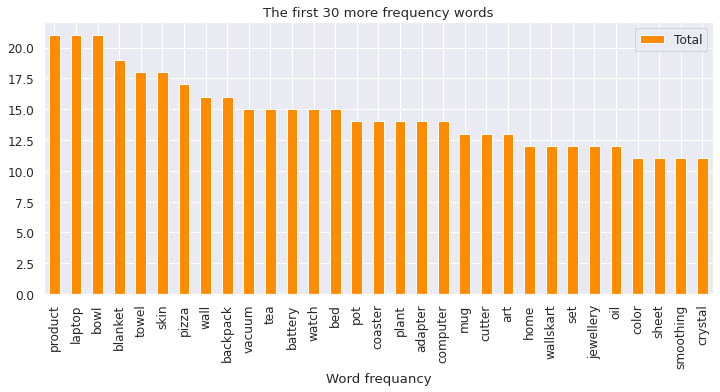

In [ ]:

df1=df.loc[0:30,['Word frequancy','Total']]

df1.plot(kind='bar',x='Word frequancy',y='Total', color="darkorange",title='The first 30 more frequency words',figsize=(12,5))


### **TF IDF**
Term frequency-inverse document frequency

Text vectorization algorithm namely TF-IDF vectorizer, which is a very popular approach for traditional machine learning algorithms can help in transforming text into vectors.
tf–idf can be successfully used for stop-words filtering in various subject fields, including text summarization and classification. One of the simplest ranking functions is computed by summing the tf–idf for each query term; many more sophisticated ranking functions are variants of this simple model.

TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vect=TfidfVectorizer (analyzer='word', stop_words= 'english',ngram_range=(1,2))
tfidf_mat=vect.fit_transform(corpus)

In [ ]:
features_names=vect.get_feature_names()
dense=tfidf_mat.todense()
denselist=dense.tolist()
words_freq=pd.DataFrame(denselist,columns=features_names)
words_freq.head()

,aaa,aapno,aari,aarika,ability,abklgrngrngrn,abklplplpnk,abklplpnkpnk,able,abode,abrasion,abroad,absolute,absorbency,absorbent,absorber,absorbing,absorbs,abstract,abstrcts,accent,access,accessory,accident,accidental,accommodate,accomplishes,according,acer,ache,aching,aci,acid,acne,acrylic,act,active,actu,actual,actx,...,xbluetooth,xcm,xcmdesign,xemex,xgb,xuser,yardley,yarn,ybscr,year,yellow,yellowblue,yellowlittle,yes,ygs,ygskb,yiboo,yield,york,youd,young,youre,youth,youthful,youve,yuva,yves,zaicus,zero,zikrak,zinc,zingalalaa,zip,zipexterior,zipper,zippered,zone,zoom,zora,zyxel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.17791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.178055,0.0,0.0,0.068639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066449,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040882,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.042645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.035767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
words_freq.shape

(1050, 4901)

In [ ]:
df=pd.DataFrame({'word_freq': words_freq.max().sort_values(ascending=False).index,'Total':words_freq.max().sort_values(ascending=False).values})


In [ ]:
df

,word_freq,Total
0,shadow,0.856539
1,qsos,0.852230
2,spethnic,0.850697
3,smj,0.846644
4,homedesires,0.845386
...,...,...
4896,cleanerthe,0.033414
4897,cleaningtwo,0.033414
4898,adjusted,0.033414
4899,shining,0.033414


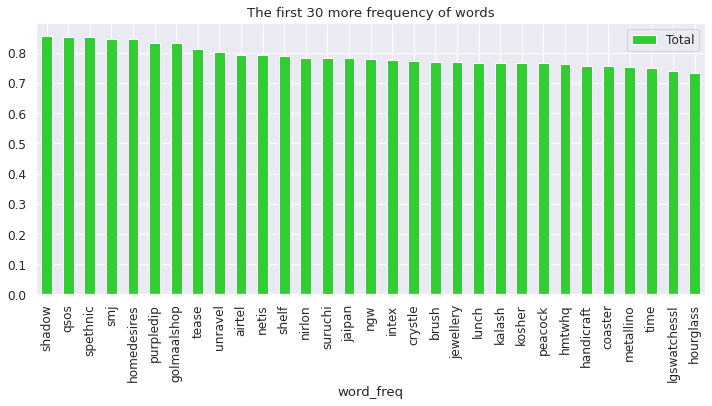

In [ ]:
df1=df.loc[0:30,['word_freq','Total']]#les 20mots les plus frequents 
df1.plot(kind='bar',x='word_freq',y='Total', color="limegreen",title='The first 30 more frequency of words',figsize=(12,5))

In [ ]:
words_freq.describe()

,aaa,aapno,aari,aarika,ability,abklgrngrngrn,abklplplpnk,abklplpnkpnk,able,abode,abrasion,abroad,absolute,absorbency,absorbent,absorber,absorbing,absorbs,abstract,abstrcts,accent,access,accessory,accident,accidental,accommodate,accomplishes,according,acer,ache,aching,aci,acid,acne,acrylic,act,active,actu,actual,actx,...,xbluetooth,xcm,xcmdesign,xemex,xgb,xuser,yardley,yarn,ybscr,year,yellow,yellowblue,yellowlittle,yes,ygs,ygskb,yiboo,yield,york,youd,young,youre,youth,youthful,youve,yuva,yves,zaicus,zero,zikrak,zinc,zingalalaa,zip,zipexterior,zipper,zippered,zone,zoom,zora,zyxel
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,...,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,0.000089,0.001192,0.000343,0.000117,0.000274,0.000255,0.000255,0.000255,0.000725,0.000342,0.000033,0.000204,0.000138,0.000180,0.001064,0.000064,0.000201,0.000058,0.011157,0.000145,0.000338,0.000099,0.001637,0.000096,0.000111,0.000033,0.000058,0.000206,0.000411,0.000142,0.000048,0.000257,0.000088,0.000331,0.000513,0.000316,0.000274,0.000425,0.001181,0.000391,...,0.000110,0.000162,0.000499,0.000408,0.000094,0.000110,0.001954,0.000587,0.000362,0.005072,0.004765,0.000095,0.000073,0.005960,0.000232,0.000058,0.000096,0.000245,0.000940,0.000047,0.000342,0.001309,0.000462,0.000349,0.000048,0.001016,0.000181,0.000055,0.000382,0.000509,0.000178,0.000149,0.000033,0.000072,0.000164,0.000033,0.000710,0.000074,0.000328,0.001352
std,0.002884,0.022796,0.011111,0.003797,0.007302,0.008277,0.008277,0.008277,0.011811,0.008034,0.001054,0.006595,0.004482,0.004289,0.017929,0.002079,0.006519,0.001892,0.060418,0.004685,0.007901,0.002419,0.015512,0.002201,0.002784,0.001054,0.001894,0.003976,0.013303,0.004595,0.001566,0.008318,0.002851,0.010734,0.016621,0.006903,0.008866,0.013761,0.011431,0.012683,...,0.003575,0.005239,0.016185,0.013222,0.003043,0.003575,0.031992,0.013634,0.011739,0.027736,0.036055,0.003085,0.002367,0.027003,0.007514,0.001878,0.003124,0.007954,0.021552,0.001524,0.007885,0.012723,0.011124,0.006660,0.001566,0.023262,0.005870,0.001787,0.010259,0.016507,0.005761,0.004822,0.001054,0.002336,0.003768,0.001054,0.016442,0.002411,0.010612,0.026068
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [ ]:
df_tfidfvect_total = pd.concat([text_data, words_freq], axis=1)
df_tfidfvect_total

,image,product_name,product_category,product_category_level,description_lemma_short,description_final,aaa,aapno,aari,aarika,ability,abklgrngrngrn,abklplplpnk,abklplpnkpnk,able,abode,abrasion,abroad,absolute,absorbency,absorbent,absorber,absorbing,absorbs,abstract,abstrcts,accent,access,accessory,accident,accidental,accommodate,accomplishes,according,acer,ache,aching,aci,acid,acne,...,xbluetooth,xcm,xcmdesign,xemex,xgb,xuser,yardley,yarn,ybscr,year,yellow,yellowblue,yellowlittle,yes,ygs,ygskb,yiboo,yield,york,youd,young,youre,youth,youthful,youve,yuva,yves,zaicus,zero,zikrak,zinc,zingalalaa,zip,zipexterior,zipper,zippered,zone,zoom,zora,zyxel
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Elegance Polyester Multicolor Abstract Eyelet ...,Home Furnishing,Curtains & Accessories,"[key, feature, elegance, polyester, multicolor...","[key, feature, elegance, polyester, multicolor...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.17791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Sathiyas Cotton Bath Towel,Baby Care,Baby Bath & Skin,"[specification, sathiyas, cotton, bath, towel,...","[specification, cotton, bath, towel, bath, tow...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.178055,0.0,0.0,0.068639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Eurospa Cotton Terry Face Towel Set,Baby Care,Baby Bath & Skin,"[key, feature, eurospa, cotton, terry, face, t...","[key, feature, cotton, terry, face, towel, set...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066449,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040882,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,d4684dcdc759dd9cdf41504698d737d8.jpg,SANTOSH ROYAL FASHION Cotton Printed King size...,Home Furnishing,Bed Linen,"[key, feature, santosh, royal, fashion, cotton...","[key, feature, santosh, royal, fashion, cotton...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.042645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Jaipur Print Cotton Floral King sized Double B...,Home Furnishing,Bed Linen,"[key, feature, jaipur, print, cotton, floral, ...","[key, feature, jaipur, print, cotton, floral, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.035767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Oren Empower Extra Large Self Adhesive Sticker,Baby Care,Baby & Kids Gifts,"[oren, empower, extra, large, self, adhesive, ...","[empower, extra, large, self, adhesive, sticke...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0

Making a **new file**

In [ ]:
# All the data in TFIDF with image & product_category 'df_tfidfvect_total'

from google.colab import drive
drive.mount('/content/drive')
df_tfidfvect_total.to_csv('df_tfidfvect_total.csv', index=False)
!cp new_df.csv /content/drive/My\ Drive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# all words after TFIDF 'words_freq'
from google.colab import drive
drive.mount('/content/drive')
words_freq.to_csv('words_freq.csv', index=False)
!cp new_df.csv /content/drive/My\ Drive/""""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# our first dataset after cleaning 'text_data'
from google.colab import drive
drive.mount('/content/drive')
text_data.to_csv('text_data.csv', index=False)
!cp new_df.csv /content/drive/My\ Drive/"""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/bin/bash: -c: line 0: unexpected EOF while looking for matching `"'
/bin/bash: -c: line 1: syntax error: unexpected end of file


In [ ]:
%cd /content/drive/My\Drive/p6
!ls

df_tfidfvect = pd.read_csv('/content/drive/MyDrive/p6/words_freq.csv')

/content/drive/MyDrive/p6
'Classifier automatiquement des biens de consommation.ipynb'   image
 df_tfidfvect.csv					       new_df.csv
 df_tfidfvect_total.csv					       results.txt
 df_untokenize_description.csv				       text_data.csv
 flipkart_com-ecommerce_sample_1050.csv			       words_freq.csv


In [ ]:
df_tfidfvect.keys()

Index(['aaa', 'aapno', 'aari', 'aarika', 'ability', 'abklgrngrngrn',
       'abklplplpnk', 'abklplpnkpnk', 'able', 'abode',
       ...
       'zinc', 'zingalalaa', 'zip', 'zipexterior', 'zipper', 'zippered',
       'zone', 'zoom', 'zora', 'zyxel'],
      dtype='object', length=4901)

In [ ]:
df_tfidfvect.describe()

,aaa,aapno,aari,aarika,ability,abklgrngrngrn,abklplplpnk,abklplpnkpnk,able,abode,abrasion,abroad,absolute,absorbency,absorbent,absorber,absorbing,absorbs,abstract,abstrcts,accent,access,accessory,accident,accidental,accommodate,accomplishes,according,acer,ache,aching,aci,acid,acne,acrylic,act,active,actu,actual,actx,...,xbluetooth,xcm,xcmdesign,xemex,xgb,xuser,yardley,yarn,ybscr,year,yellow,yellowblue,yellowlittle,yes,ygs,ygskb,yiboo,yield,york,youd,young,youre,youth,youthful,youve,yuva,yves,zaicus,zero,zikrak,zinc,zingalalaa,zip,zipexterior,zipper,zippered,zone,zoom,zora,zyxel
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,...,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,0.000089,0.001192,0.000343,0.000117,0.000274,0.000255,0.000255,0.000255,0.000725,0.000342,0.000033,0.000204,0.000138,0.000180,0.001064,0.000064,0.000201,0.000058,0.011157,0.000145,0.000338,0.000099,0.001637,0.000096,0.000111,0.000033,0.000058,0.000206,0.000411,0.000142,0.000048,0.000257,0.000088,0.000331,0.000513,0.000316,0.000274,0.000425,0.001181,0.000391,...,0.000110,0.000162,0.000499,0.000408,0.000094,0.000110,0.001954,0.000587,0.000362,0.005072,0.004765,0.000095,0.000073,0.005960,0.000232,0.000058,0.000096,0.000245,0.000940,0.000047,0.000342,0.001309,0.000462,0.000349,0.000048,0.001016,0.000181,0.000055,0.000382,0.000509,0.000178,0.000149,0.000033,0.000072,0.000164,0.000033,0.000710,0.000074,0.000328,0.001352
std,0.002884,0.022796,0.011111,0.003797,0.007302,0.008277,0.008277,0.008277,0.011811,0.008034,0.001054,0.006595,0.004482,0.004289,0.017929,0.002079,0.006519,0.001892,0.060418,0.004685,0.007901,0.002419,0.015512,0.002201,0.002784,0.001054,0.001894,0.003976,0.013303,0.004595,0.001566,0.008318,0.002851,0.010734,0.016621,0.006903,0.008866,0.013761,0.011431,0.012683,...,0.003575,0.005239,0.016185,0.013222,0.003043,0.003575,0.031992,0.013634,0.011739,0.027736,0.036055,0.003085,0.002367,0.027003,0.007514,0.001878,0.003124,0.007954,0.021552,0.001524,0.007885,0.012723,0.011124,0.006660,0.001566,0.023262,0.005870,0.001787,0.010259,0.016507,0.005761,0.004822,0.001054,0.002336,0.003768,0.001054,0.016442,0.002411,0.010612,0.026068
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [ ]:
%cd /content/drive/My\Drive/p6
!ls

text_data = pd.read_csv('/content/drive/MyDrive/p6/text_data.csv')

/content/drive/MyDrive/p6
'Classifier automatiquement des biens de consommation.ipynb'   image
 df_tfidfvect.csv					       new_df.csv
 df_tfidfvect_total.csv					       results.txt
 df_untokenize_description.csv				       text_data.csv
 flipkart_com-ecommerce_sample_1050.csv			       words_freq.csv


### **PCA**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X=df_tfidfvect.values

features=df_tfidfvect.columns
from sklearn import decomposition
n_comp=0.95
pca=decomposition.PCA(n_components=n_comp)
pca.fit(X)

PCA(n_components=0.95)

In [ ]:
# fonction qui trace le graphique des eboulis des valeurs propres
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(), c="red", marker='.')
    plt.xlabel("rank of the axis of inertia")
    plt.ylabel("percentage of inertia")
    plt.title("Eigenvalue decay")
    plt.show(block=False)

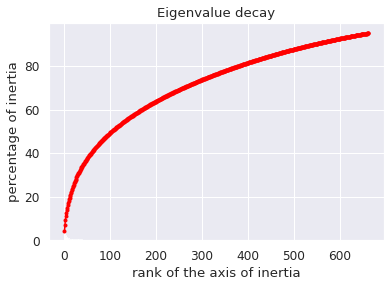

In [ ]:

display_scree_plot(pca)

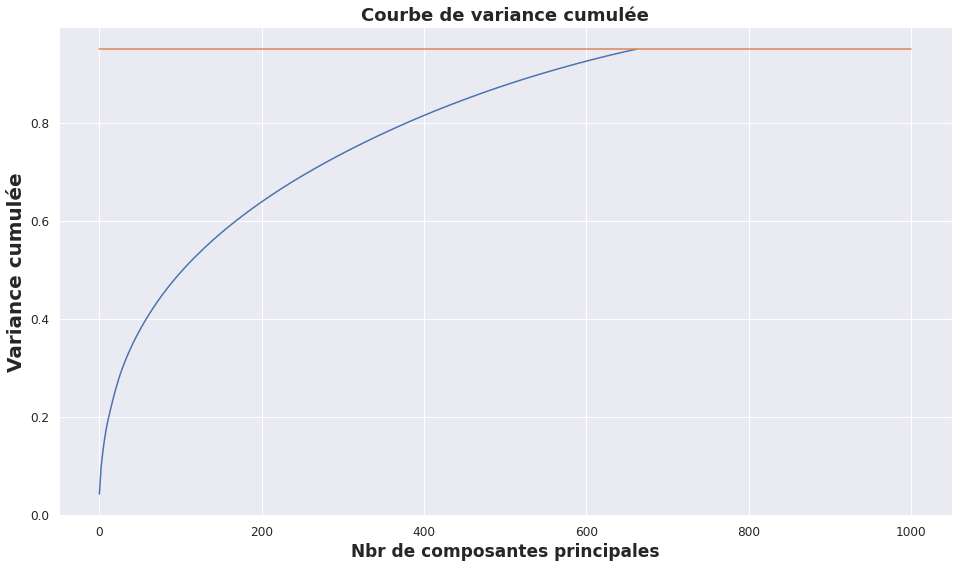

In [ ]:
plt.figure(figsize=(16, 9))
plt.ylabel("Variance cumulée", weight='bold', size=20)
plt.xlabel('Nbr de composantes principales', weight='bold', size=17)
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.title('Courbe de variance cumulée', size=18, weight='bold')
plt.plot([0,1000], [0.95, 0.95])

In [ ]:
c = 0
for i in pca.explained_variance_ratio_.cumsum():
    c += 1
    if(i > 0.95):
        print(
            'we need {} componants to explaine 95% of the variance of dataset'.format(c))
        break

we need 662 componants to explaine 95% of the variance of dataset


In [ ]:
compo = pca.components_
n_components=df_tfidfvect.shape[1]
num_compo = pca.n_components
num_compo

0.95

In [ ]:
pca.n_components

0.95

In [ ]:
a_show = pca.transform(df_tfidfvect)[:, 0]  # Component 1

b_show = pca.transform(df_tfidfvect)[:, 1]  # Component 2

X_pca = pca.transform(df_tfidfvect)[:, :]

In [ ]:
compo

array([[-3.48110737e-04, -1.19013401e-03, -1.30767992e-03, ...,
        -3.13987275e-04, -1.32581886e-03,  7.21098350e-03],
       [ 6.05797074e-05, -1.84223322e-03,  5.18651129e-04, ...,
         6.72102022e-05, -3.71156128e-04, -7.34086641e-03],
       [-2.43251229e-04, -5.09784793e-04, -8.89375073e-04, ...,
        -2.21589367e-04, -1.61869099e-03,  6.51992149e-04],
       ...,
       [ 6.15466727e-04,  2.66097679e-02,  1.35239709e-02, ...,
         2.39320481e-03,  6.70068816e-03,  1.73919213e-02],
       [ 2.08835574e-03,  1.45541808e-03,  1.20366033e-02, ...,
         3.59499210e-04,  1.13951133e-02, -1.59794889e-02],
       [ 5.40956363e-03,  6.75788273e-03,  1.72112493e-02, ...,
         3.23409403e-03,  6.74052750e-03, -2.84334320e-02]])

In [ ]:
a_show = pca.transform(df_tfidfvect)[:, 0]  # Component 1

b_show = pca.transform(df_tfidfvect)[:, 1]  # Component 2

X_pca = pca.transform(df_tfidfvect)[:, :c]

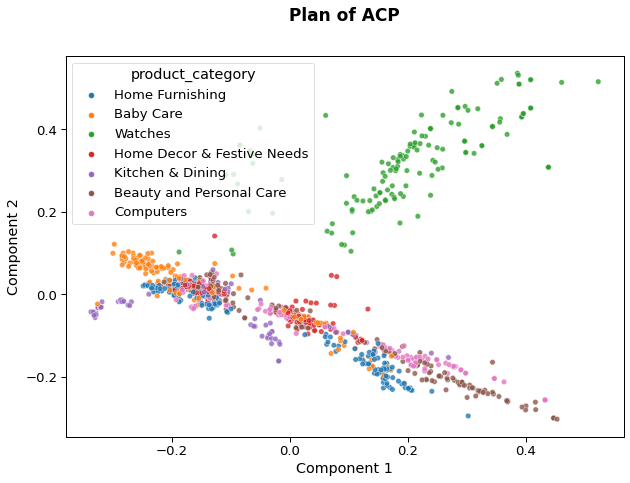

In [ ]:
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(10, 7))

plt.title("Plan of ACP", fontsize = 17, pad = 35, fontweight = 'bold')
plt.xlabel("Component 1")
plt.ylabel("Component 2")
ax = plt.gca()

sns.scatterplot(
    x=a_show,
    y=b_show,
    hue=text_data['product_category'],
    alpha=0.8,
    s=30
)
sns.set_context("paper", font_scale=1)

### **T-SNE**

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, init="pca")
X_tsne = tsne.fit_transform(X_pca)

In [ ]:
df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = text_data["product_category"]
print(df_tsne.shape)

(1050, 3)


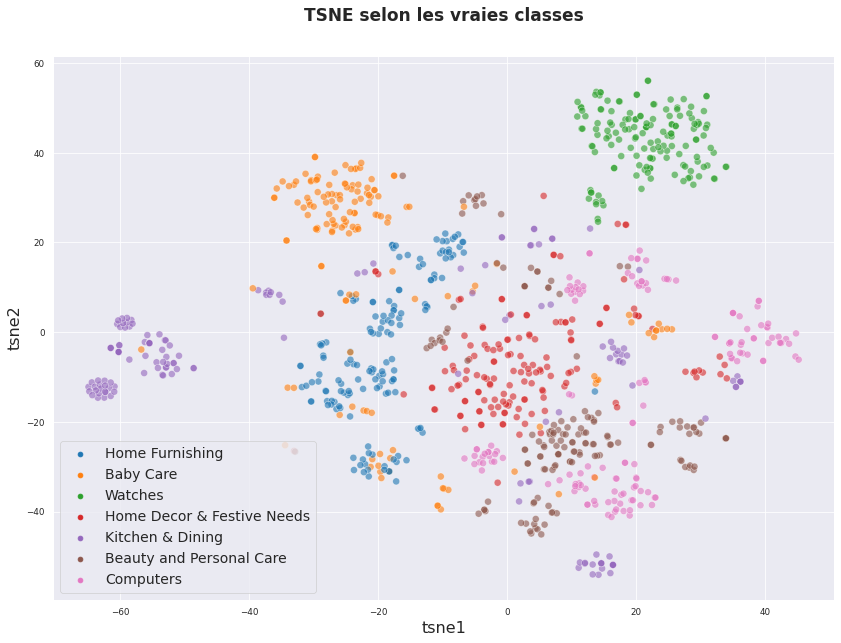

In [ ]:
plt.figure(figsize=(14,10))

sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 17, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 16)
plt.ylabel('tsne2', fontsize = 16)
plt.legend(prop={'size': 14}) 


Text(0, 0.5, 'tsne2')

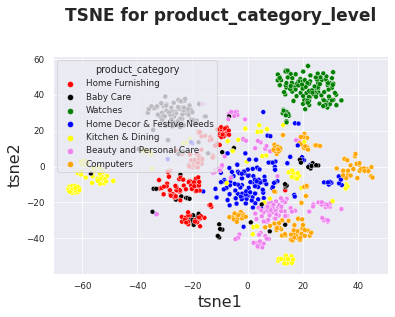

In [ ]:
plt.figure()
pal = ['red', 'black', 'green', 'blue', 'yellow', 'violet','orange']
sns.scatterplot(y='tsne2', x='tsne1', hue=data['product_category'],
                    palette=pal, data=df_tsne)
plt.title('TSNE for product_category_level', fontsize = 17, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 16)
plt.ylabel('tsne2', fontsize = 16)


### **Clustering**


* Kmeans
* Clustering hiérarchique
* DBSCAN